# Single layer Neural Network

In this notebook, we will code a single neuron and use it as a linear classifier with two inputs. The tuning of the neuron parameters is done by backpropagation using gradient descent.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

# matplotlib to display the data
import matplotlib
matplotlib.rc('font', size=16)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
from matplotlib import pyplot as plt, cm
from matplotlib.colors import ListedColormap
%matplotlib inline

## Dataset

Let's create some labeled data in the form of (X, y) with an associated class which can be 0 or 1. For this we can use the function `make_blobs` in the `sklearn.datasets` module. Here we use 2 centers with coordinates (-0.5, -1.0) and (1.0, 1.0).

In [2]:
X, y = make_blobs(n_features=2, random_state=42, centers=[(-0.5, -1.0), (1.0, 1.0)])
y = y.reshape((y.shape[0], 1))
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


Plot our training data using `plt.scatter` to have a first visualization. Here we color the points with their labels stored in `y`.

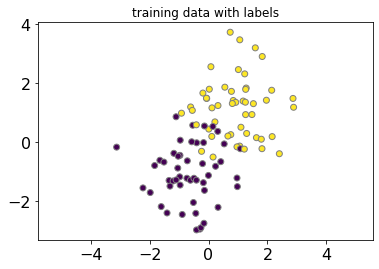

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), edgecolors='gray')
plt.title('training data with labels')
plt.axis('equal')
plt.show()

## Activation functions

Here we play with popular activation functions like tanh, ReLu or sigmoid.

In [10]:
def heaviside(x):
    return np.heaviside(x, np.zeros_like(x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def leaky_ReLU(x, alpha=0.1):
    return np.maximum(alpha * x, x)

def tanh(x):
    return np.tanh(x)

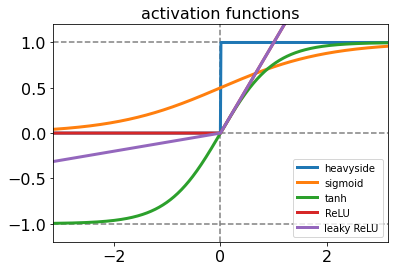

In [11]:
from math import pi

plt.figure()
x = np.arange(-pi, pi, 0.01)
plt.axhline(y=0., color='gray', linestyle='dashed')
plt.axhline(y=-1, color='gray', linestyle='dashed')
plt.axhline(y=1., color='gray', linestyle='dashed')
plt.axvline(x=0., color='gray', linestyle='dashed')

plt.xlim(-pi, pi)
plt.ylim(-1.2, 1.2)
plt.title('activation functions', fontsize=16)

plt.plot(x, heaviside(x), label='heavyside', linewidth=3)
legend = plt.legend(loc='lower right')
plt.savefig('activation_functions_1.pdf')
plt.plot(x, sigmoid(x), label='sigmoid', linewidth=3)
plt.legend(loc='lower right')
plt.savefig('activation_functions_2.pdf')
plt.plot(x, tanh(x), label='tanh', linewidth=3)
plt.legend(loc='lower right')
plt.savefig('activation_functions_3.pdf')
plt.plot(x, ReLU(x), label='ReLU', linewidth=3)
plt.legend(loc='lower right')
plt.savefig('activation_functions_4.pdf')
plt.plot(x, leaky_ReLU(x), label='leaky ReLU', linewidth=3)
plt.legend(loc='lower right')
plt.savefig('activation_functions_5.pdf')
plt.show()

In [12]:
# gradients of the activation functions
def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu_grad(x):
    return 1. * (x > 0)

def tanh_grad(x):
    return 1 - np.tanh(x) ** 2

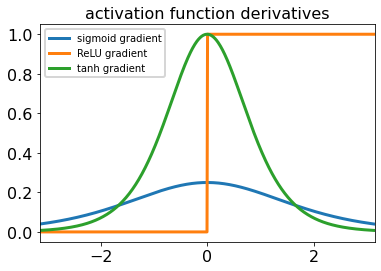

In [13]:
plt.figure()
x = np.arange(-pi, pi, 0.01)
plt.plot(x, sigmoid_grad(x), label='sigmoid gradient', linewidth=3)
plt.plot(x, relu_grad(x), label='ReLU gradient', linewidth=3)
plt.plot(x, tanh_grad(x), label='tanh gradient', linewidth=3)
plt.xlim(-pi, pi)
plt.title('activation function derivatives', fontsize=16)
legend = plt.legend()
legend.get_frame().set_linewidth(2)
plt.savefig('activation_functions_derivatives.pdf')
plt.show()

## ANN implementation

A simple neuron with two inputs $(x_1, x_2)$ which applies an affine transform of weigths $(w_1, w_2)$ and bias $w_0$.

The neuron compute the quantity called activation $a=\sum_i w_i x_i + w_0 = w_0 + w_1 x_1 + w_2 x_2$

This quantity is send to the activation function chosen to be a sigmoid function here: $f(a)=\dfrac{1}{1+e^{-a}}$

$f(a)$ is the output of the neuron bounded between 0 and 1.

### Quick implementation

First let's implement our network in a concise fashion.

In [21]:
import numpy as np
from numpy.random import randn

X, y = make_blobs(n_samples= 100, n_features=2, random_state=42, centers=[[-0.5, -1], [1, 1]])
# adjust the sizes of our arrays
X = np.c_[np.ones(X.shape[0]), X]
print(X.shape)
y = y.reshape((y.shape[0], 1))

np.random.seed(2)
W = randn(3, 1)
print('* model params: {}'.format(W.tolist()))
eta = 1e-2  # learning rate
n_epochs = 50

for t in range(n_epochs):
    # forward pass
    y_pred = sigmoid(X.dot(W))
    loss = np.sum((y_pred - y) ** 2)
    print(t, loss)

    # backprop
    grad_y_pred = 2 * (y_pred - y)
    grad_W = np.dot(X.T, grad_y_pred * y_pred * (1 - y_pred))

    # update rule
    W -= eta * grad_W
print('* new model params: {}'.format(W.tolist()))


(100, 3)
* model params: [[-0.4167578474054706], [-0.056266827226329474], [-2.136196095668454]]
0 69.888678007119
1 68.10102729420157
2 66.01234835808539
3 63.52920474304009
4 60.511931504891606
5 56.781412908257316
6 52.17672528838464
7 46.67324119014275
8 40.42792006624582
9 33.65215682518604
10 26.70717521140393
11 20.544252734780706
12 16.198710182740403
13 13.580478268635446
14 11.983692035385701
15 10.922630988132667
16 10.16098958742113
17 9.58305898101223
18 9.126953943573383
19 8.756534709365818
20 8.449122187454204
21 8.189655164236605
22 7.967673714087983
23 7.77564748980427
24 7.607993124138909
25 7.460467877966521
26 7.329780007443549
27 7.213329709562506
28 7.109031799422667
29 7.0151912380112025
30 6.93041381013332
31 6.85354076229679
32 6.783600131596645
33 6.71976992958227
34 6.661349894574377
35 6.607739535904203
36 6.558420865715362
37 6.512944669754438
38 6.470919482932122
39 6.43200265563964
40 6.395893053272442
41 6.36232504406938
42 6.331063512489355
43 6.3018996

### Modular implementation

Now let's create a class to represent our neural network to have more flexibility and modularity. This will prove to be useful later when we add more layers.

In [22]:
class SingleLayerNeuralNetwork:
    """A simple artificial neuron with a single layer and two inputs. 
    
    This type of network is called a Single Layer Neural Network and belongs to 
    the Feed-Forward Neural Networks. Here, the activation function is a sigmoid, 
    the loss is computed using the squared error between the target and 
    the prediction. Learning the parameters is achieved using back-propagation 
    and gradient descent
    """
    
    def __init__(self, eta=0.01, rand_seed=42):
        """Initialisation routine."""
        np.random.seed(rand_seed)
        self.W = np.random.randn(3, 1)  # weigths
        self.eta = eta  # learning rate
        self.loss_history = []
    
    def sigmoid(self, x):
        """Our activation function."""
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_grad(self, x):
        """Gradient of the sigmoid function."""
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def predict(self, X, bias_trick=True):
        X = np.atleast_2d(X)
        if bias_trick:
            # bias trick: add a column of 1 to X
            X = np.c_[np.ones((X.shape[0])), X]
        return self.sigmoid(np.dot(X, self.W))
    
    def loss(self, X, y, bias_trick=False):
        """Compute the squared error loss for a given set of inputs."""
        y_pred = self.predict(X, bias_trick=bias_trick)
        y_pred = y_pred.reshape((y_pred.shape[0], 1))
        loss = np.sum((y_pred - y) ** 2)
        return loss
        
    def back_propagation(self, X, y):
        """Conduct backpropagation to update the weights."""
        X = np.atleast_2d(X)
        y_pred = self.sigmoid(np.dot(X, self.W)).reshape((X.shape[0], 1))
        grad_y_pred = 2 * (y_pred - y)
        grad_W = np.dot(X.T, grad_y_pred * y_pred * (1 - y_pred))

        # update weights
        self.W -= eta * grad_W
        
    def fit(self, X, y, n_epochs=10, method='batch', save_fig=False):
        """Perform gradient descent on a given number of epochs to update the weights."""
        # bias trick: add a column of 1 to X
        X = np.c_[np.ones((X.shape[0])), X]
        self.loss_history.append(self.loss(X, y))  # initial loss
        for i_epoch in range(n_epochs):
            if method == 'batch':
                # perform backprop on the whole training set (batch)
                self.back_propagation(X, y)
                # weights were updated, compute the loss
                loss = self.loss(X, y)
                self.loss_history.append(loss)
                print(i_epoch, self.loss_history[-1])
            else:
                # here we update the weight for every data point (SGD)
                for (xi, yi) in zip(X, y):
                    self.back_propagation(xi, yi)
                    # weights were updated, compute the loss
                    loss = self.loss(X, y)
                    self.loss_history.append(loss)
            if save_fig:
                self.plot_model(i_epoch, save=True, display=False)

    def decision_boundary(self, x):
        """Return the decision boundary in 2D."""
        return -self.W[0] / self.W[2] - self.W[1] / self.W[2] * x
    
    def plot_model(self, i_epoch=-1, save=False, display=True):
        """Build a figure to vizualise how the model perform."""
        xx0, xx1 = np.arange(-3, 3.1, 0.1), np.arange(-3, 4.1, 0.1)
        XX0, XX1 = np.meshgrid(xx0, xx1)
        # apply the model to the grid
        y_an = np.empty(len(XX0.ravel()))
        i = 0
        for (x0, x1) in zip(XX0.ravel(), XX1.ravel()):
            y_an[i] = self.predict(np.array([x0, x1]))
            i += 1
        y_an = y_an.reshape((len(xx1), len(xx0)))
        figure = plt.figure(figsize=(12, 4))
        ax1 = plt.subplot(1, 3, 1)
        #ax1.set_title(r'$w_0=%.3f$, $w_1=%.3f$, $w_2=%.3f$' % (self.W[0], self.W[1], self.W[2]))
        ax1.set_title("current prediction")
        ax1.contourf(XX0, XX1, y_an, alpha=.5)
        ax1.scatter(X[:, 0], X[:, 1], c=y.squeeze(), edgecolors='gray')
        ax1.set_xlim(-3, 3)
        ax1.set_ylim(-3, 4)
        print(ax1.get_xlim())
        x = np.array(ax1.get_xlim())
        ax1.plot(x, self.decision_boundary(x), 'k-', linewidth=2)
        ax2 = plt.subplot(1, 3, 2)
        x = np.arange(3)  # the label locations
        rects1 = ax2.bar(x, [self.W[0, 0], self.W[1, 0], self.W[2, 0]])
        ax2.set_title('model parameters')
        ax2.set_xticks(x)
        ax2.set_xticklabels([r'$w_0$', r'$w_1$', r'$w_2$'])
        ax2.set_ylim(-1, 2)
        ax2.set_yticks([0, 2])
        ax2.axhline(xmin=0, xmax=2)
        ax3 = plt.subplot(1, 3, 3)
        ax3.plot(self.loss_history, c='lightgray', lw=2)
        if i_epoch < 0:
            i_epoch = len(self.loss_history) - 1
        ax3.plot(i_epoch, self.loss_history[i_epoch], 'o')
        ax3.set_title('loss evolution')
        ax3.set_yticks([])
        plt.subplots_adjust(left=0.05, right=0.98)
        if save:
            plt.savefig('an_%02d.png' % i_epoch)
        if display:
            plt.show()
        plt.close()


### Train our model on the data set

Create two blobs with $n=1000$ data points.

Instantiate the model with $\eta$=0.1 and a random seed of 2.

Train the model using the batch gradient descent on 20 epochs.

In [40]:
X, y = make_blobs(n_samples=10000, n_features=2, random_state=42, centers=[[-0.5, -1], [1, 1]])
y = y.reshape((y.shape[0], 1))

an1 = SingleLayerNeuralNetwork(eta=0.1, rand_seed=2)
print('* init model params: {}'.format(an1.W.tolist()))
print(an1.loss(X, y, bias_trick=True))
an1.fit(X, y, n_epochs=100, method='batch', save_fig=False)
print('* new model params: {}'.format(an1.W.tolist()))

* init model params: [[-0.4167578474054706], [-0.056266827226329474], [-2.136196095668454]]
6813.791619744032
0 1065.5244005560853
1 1004.2834940985097
2 972.1020148641242
3 952.1899581995993
4 938.3234296045975
5 927.9765410132449
6 919.2260496173226
7 911.8159986339842
8 906.2581276170479
9 902.2935497103937
10 899.2937229391691
11 896.835926605091
12 894.6988964194702
13 892.7681058525101
14 890.9810531145381
15 889.2998538790825
16 887.6974929083249
17 886.1513240313166
18 884.6406287755832
19 883.1462463333798
20 881.6509308886809
21 880.1396760889339
22 878.5997412921436
23 877.0204069660281
24 875.3925836022929
25 873.7083854938818
26 871.9607354016401
27 870.1430269399661
28 868.2488478128737
29 866.2717560113587
30 864.2050976414034
31 862.0418553064648
32 859.7745176798607
33 857.3949630082162
34 854.8943514010089
35 852.2630228507501
36 849.4904001520829
37 846.5648985409571
38 843.4738474024027
39 840.2034344600186
40 836.7386904645787
41 833.063544079041
42 829.16099477268

Now we have trained our model, plot the results

(-3.0, 3.0)


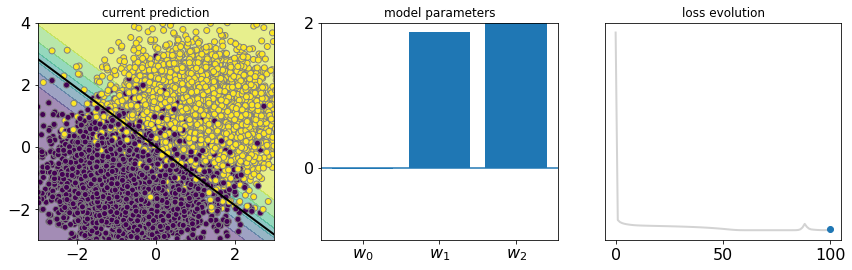

In [41]:
an1.plot_model()

Now try to train another network using SGD. Use only 1 epoch since with SGD, we are updating the weights with every training point (so $n$ times per epoch).

In [42]:
an2 = SingleLayerNeuralNetwork(eta=0.1, rand_seed=2)
print('* init model params: {}'.format(an2.W.tolist()))
an2.fit(X, y, n_epochs=1, method='SGD', save_fig=False)
print('* new model params: {}'.format(an2.W.tolist()))

* init model params: [[-0.4167578474054706], [-0.056266827226329474], [-2.136196095668454]]
* new model params: [[-0.3089337810149369], [1.2172382480136865], [1.6614794435241786]]


plot the difference in terms of loss evolution using batch or stochastic gradient descent

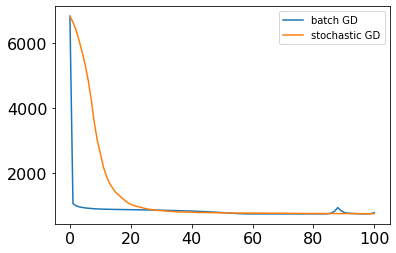

In [43]:
plt.plot(an1.loss_history[:], label='batch GD')
plt.plot(an2.loss_history[::100], label='stochastic GD')
#plt.ylim(0, 2000)
plt.legend()
plt.show()

(-3.0, 3.0)


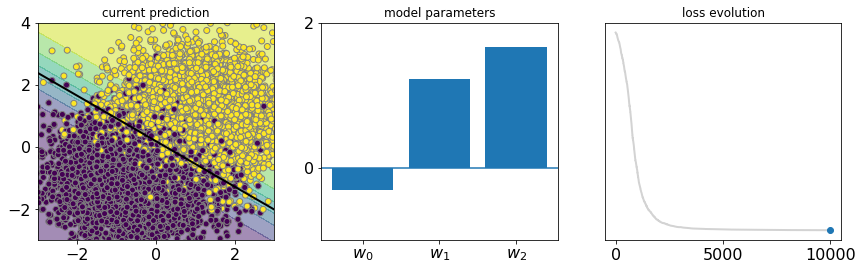

In [39]:
an2.plot_model()

## Logistic regression

Our single layer network using the logistic function for activation is very similar to the logistic regression we saw in a previous tutorial. We can easily compare our result with the logistic regression using `sklearn` toolbox.

In [44]:
from sklearn.linear_model import LogisticRegression

X, y = make_blobs(n_samples=1000, n_features=2, random_state=42, centers=[[-0.5, -1], [1, 1]])
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)
print(log_reg.coef_)
print(log_reg.intercept_)

[[1.5698506  1.81179711]]
[-0.50179977]


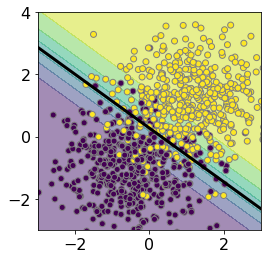

In [45]:
x0, x1 = np.meshgrid(
        np.linspace(-3, 3.1, 62).reshape(-1, 1),
        np.linspace(-3, 4.1, 72).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

plt.figure(figsize=(4, 4))
contour = plt.contourf(x0, x1, zz, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='gray')

# decision boundary
x_bounds = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * x_bounds + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(x_bounds, boundary, "k-", linewidth=3)

plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.show()